# Bayesian Statistics

## Conditional Probability

Definition: $$ P(A|B) = \frac{P(A, B)}{P(B)} $$

If A and B are independent: $P(A|B) = P(A)$, since $P(A,B)=P(A)P(B)$.

## Bayes Theorem

Since $P(A, B) = P(B, A)$

$$ P(A|B)P(B) = P(B|A)P(A) $$

Therefore

$$ P(A|B) = \frac{P(B|A)P(A)}{P(B)} $$

Example: Monty Hall Problem

1. FREQUENTIST STATISTICAL INFERENCE: $p(A) =$ long-run relative frequency with which A occurs in identical repeats of an experiment. ‘‘A’’ restricted to propositions about random variables.
2. BAYESIAN INFERENCE $p(A|B)$ a real number measure of the plausibility of a proposition/hypothesis A, given (conditional on) the truth of the information represented by proposition B. ‘‘A’’ can be any logical proposition, not restricted to propositions about random variables.

Examples of propositions:

A $\equiv$ ‘‘The newly discovered radio astronomy object is a galaxy.’’

B $\equiv$ ‘‘The measured redshift of the object is $0.150 \pm 0.005$.’’

A $\equiv$ ‘‘Theory X is correct.’’

A $\equiv$ ‘‘Theory X is not correct.’’

A $\equiv$ ‘‘The frequency of the signal is between $f$ and $f + df$.’’

## Hypothesis test

$$ p(H_i|D, I) = \frac{p(H_i|I)p(D|H_i, I)}{p(D|I)} $$

where:

$H_i \equiv$ proposition asserting the truth of a hypothesis of interest

$I \equiv$ proposition representing our prior information (the model)

$D \equiv$ proposition representing data

$p(D|H_i, I) \equiv$ probability of obtaining data $D$; if $H_i$ and $I$ are true also called the likelihood function $\mathcal{L}(\theta)$, where $\theta$ is the model parameters vector.

$p(H_i|I) \equiv$ prior probability of hypothesis, $\Pi (\theta)$.

$p(H_i|D, I) \equiv$ posterior probability of $H_i$, $P(\theta)$

$p(D|I) \equiv$ Evidence or global likelihood ($\mathcal{Z}$). The normalization factor which ensures $$ \int_{S} p(H_i|D, I) d\theta = \int_{S} p(\theta|D, I) d\theta = 1$$. Therefore $$ p(D|I) = \int_{S} p(H_i|I)p(D|H_i, I)d\theta$$

## Example: Spectral line emission

### Data

In [1]:
import numpy as np

import matplotlib.pyplot as plt

In [2]:
spec = np.loadtxt('data/spec_line.dat')

channels = np.arange(1, 65)

Text(0, 0.5, 'Signal (mK)')

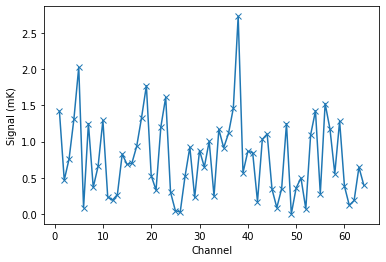

In [3]:
plt.plot(channels, spec, 'x-')

plt.xlabel('Channel')
plt.ylabel('Signal (mK)')

### Hypothesis (Models)

$M_1$: Gaussian shape: $$ T(\nu) = T_0\times f(\nu) = T_0 \exp\left[ -\frac{(\nu-\nu_0)^2}{2 \sigma_L^2} \right]$$

where

$T_0$: Signal amplitude

$\nu_0$: Signal frequency

$\sigma_L$: Signal width

In [4]:
nu = np.arange(0, 65)

T0 = 2.5
nu0 = 36
sigL = 5



Text(0, 0.5, 'Signal (mK)')

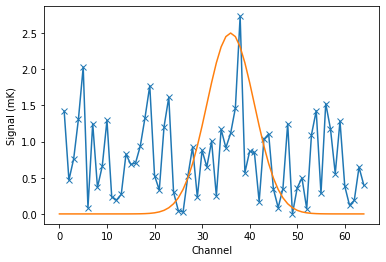

In [5]:
T = T0*np.exp(-.5*((nu-nu0)/sigL)**2)

plt.plot(channels, spec, 'x-')
plt.plot(nu, T)

plt.xlabel('Channel')
plt.ylabel('Signal (mK)')

### Parameter estimation

Posterior:

$$ P(\theta) = \frac{\mathcal{L}(\theta)\Pi(\theta)}{\mathcal{Z}} $$

The best fit value is that which maximizes the posterior:

Prior: Uniform on all parameters $$ 0 < T_0 < T_{max} ~~~~~ 1 \leq \nu_0 \leq 64 ~~~~~ 1 \leq \sigma_L \leq 63$$

Likelihood: Normal noise, i.e. $\epsilon = T_i - T_0 \times f(\nu_i, \nu_0, \sigma_L) \sim \sigma \mathcal{N}(0,1)$, therefore

$$ \mathcal{L_i}(T_0, \nu_0, \sigma_L) = \frac{1}{\sqrt{2\pi}\sigma}\exp\left\{- \frac{[T_i-T_0\times f(\nu_i)]^2}{2\sigma^2} \right\} $$

$$ \mathcal{L}(T_0, \nu_0, \sigma_L) = \prod_i \mathcal{L_i}(T_0, \nu_0, \sigma_L) $$

$$ \mathcal{L_i}(x) = \frac{1}{\sqrt{2\pi}\sigma}\exp\left\{- \frac{[f(x)-\mu]^2}{2\sigma^2} \right\} $$

In [6]:
T0 = np.linspace(0, spec.max())

T0

array([0.        , 0.0557551 , 0.1115102 , 0.16726531, 0.22302041,
       0.27877551, 0.33453061, 0.39028571, 0.44604082, 0.50179592,
       0.55755102, 0.61330612, 0.66906122, 0.72481633, 0.78057143,
       0.83632653, 0.89208163, 0.94783673, 1.00359184, 1.05934694,
       1.11510204, 1.17085714, 1.22661224, 1.28236735, 1.33812245,
       1.39387755, 1.44963265, 1.50538776, 1.56114286, 1.61689796,
       1.67265306, 1.72840816, 1.78416327, 1.83991837, 1.89567347,
       1.95142857, 2.00718367, 2.06293878, 2.11869388, 2.17444898,
       2.23020408, 2.28595918, 2.34171429, 2.39746939, 2.45322449,
       2.50897959, 2.56473469, 2.6204898 , 2.6762449 , 2.732     ])

In [138]:
nu0=np.linspace(35, 40, 80)

nu0

array([35.        , 35.06329114, 35.12658228, 35.18987342, 35.25316456,
       35.3164557 , 35.37974684, 35.44303797, 35.50632911, 35.56962025,
       35.63291139, 35.69620253, 35.75949367, 35.82278481, 35.88607595,
       35.94936709, 36.01265823, 36.07594937, 36.13924051, 36.20253165,
       36.26582278, 36.32911392, 36.39240506, 36.4556962 , 36.51898734,
       36.58227848, 36.64556962, 36.70886076, 36.7721519 , 36.83544304,
       36.89873418, 36.96202532, 37.02531646, 37.08860759, 37.15189873,
       37.21518987, 37.27848101, 37.34177215, 37.40506329, 37.46835443,
       37.53164557, 37.59493671, 37.65822785, 37.72151899, 37.78481013,
       37.84810127, 37.91139241, 37.97468354, 38.03797468, 38.10126582,
       38.16455696, 38.2278481 , 38.29113924, 38.35443038, 38.41772152,
       38.48101266, 38.5443038 , 38.60759494, 38.67088608, 38.73417722,
       38.79746835, 38.86075949, 38.92405063, 38.98734177, 39.05063291,
       39.11392405, 39.17721519, 39.24050633, 39.30379747, 39.36

In [139]:
sigL=np.linspace(1, 10, 100)

sigL

array([ 1.        ,  1.09090909,  1.18181818,  1.27272727,  1.36363636,
        1.45454545,  1.54545455,  1.63636364,  1.72727273,  1.81818182,
        1.90909091,  2.        ,  2.09090909,  2.18181818,  2.27272727,
        2.36363636,  2.45454545,  2.54545455,  2.63636364,  2.72727273,
        2.81818182,  2.90909091,  3.        ,  3.09090909,  3.18181818,
        3.27272727,  3.36363636,  3.45454545,  3.54545455,  3.63636364,
        3.72727273,  3.81818182,  3.90909091,  4.        ,  4.09090909,
        4.18181818,  4.27272727,  4.36363636,  4.45454545,  4.54545455,
        4.63636364,  4.72727273,  4.81818182,  4.90909091,  5.        ,
        5.09090909,  5.18181818,  5.27272727,  5.36363636,  5.45454545,
        5.54545455,  5.63636364,  5.72727273,  5.81818182,  5.90909091,
        6.        ,  6.09090909,  6.18181818,  6.27272727,  6.36363636,
        6.45454545,  6.54545455,  6.63636364,  6.72727273,  6.81818182,
        6.90909091,  7.        ,  7.09090909,  7.18181818,  7.27

In [140]:
sigma = spec.std()

mean = np.median(spec)

sigma

0.5509192032465917

In [141]:
channels

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64])

In [142]:
spec

array([1.420e+00, 4.680e-01, 7.620e-01, 1.312e+00, 2.029e+00, 8.600e-02,
       1.249e+00, 3.680e-01, 6.570e-01, 1.294e+00, 2.350e-01, 1.920e-01,
       2.690e-01, 8.270e-01, 6.850e-01, 7.020e-01, 9.370e-01, 1.331e+00,
       1.772e+00, 5.300e-01, 3.300e-01, 1.205e+00, 1.613e+00, 3.000e-01,
       4.600e-02, 2.600e-02, 5.190e-01, 9.240e-01, 2.300e-01, 8.770e-01,
       6.500e-01, 1.004e+00, 2.480e-01, 1.169e+00, 9.150e-01, 1.113e+00,
       1.463e+00, 2.732e+00, 5.710e-01, 8.650e-01, 8.490e-01, 1.710e-01,
       1.031e+00, 1.105e+00, 3.440e-01, 8.700e-02, 3.510e-01, 1.248e+00,
       1.000e-03, 3.600e-01, 4.970e-01, 7.200e-02, 1.094e+00, 1.425e+00,
       2.830e-01, 1.526e+00, 1.174e+00, 5.580e-01, 1.282e+00, 3.840e-01,
       1.200e-01, 1.870e-01, 6.460e-01, 3.990e-01])

In [143]:
def Likelihood(T0, nu0, sigL):
    
    T_obs = spec
    
    nu = channels
    T_th = mean + T0 * np.exp(-.5*((nu-nu0)/sigL)**2)
    
    dT = (T_obs - T_th)/sigma
    
    return np.exp(-0.5*dT**2).prod()

In [144]:
vLikelihood = np.vectorize(Likelihood)

In [145]:
#T0_grid, nu0_grid, sigL_grid = np.meshgrid(T0, nu0, sigL)

T0_grid, nu0_grid = np.meshgrid(T0, nu0)

In [146]:
sigL_grid.shape

(80, 50, 100)

In [147]:
L = vLikelihood(T0_grid, nu0_grid, 1)

In [148]:
L.max()

3.6496439529093174e-12

In [241]:
Lr = L.ravel()

i_max = np.argmax(Lr)

In [242]:
Lr[i_max]

3.6496439529093174e-12

In [151]:
T0r = T0_grid.ravel()
nu0r = nu0_grid.ravel()
#sigLr = sigL_grid.ravel()

In [243]:
T0r[i_max], nu0r[i_max]#, sigLr[i]

(1.505387755102041, 37.65822784810126)

Text(0, 0.5, 'Signal (mK)')

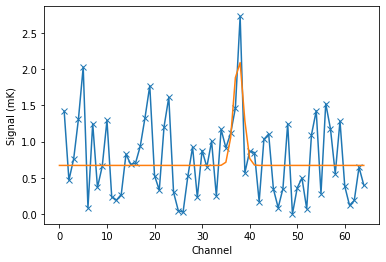

In [153]:
T = mean + T0r[i]*np.exp(-.5*((nu-nu0r[i]))**2)

plt.plot(channels, spec, 'x-')
plt.plot(nu, T)

plt.xlabel('Channel')
plt.ylabel('Signal (mK)')

In [154]:
nu0.shape, T0.shape#, sigL.shape

((80,), (50,))

In [155]:
L.shape

(80, 50)

In [156]:
#L_marg_sigL = L.sum(axis=2)
L_marg_T0 = L.sum(axis=1)
L_marg_nu0 = L.sum(axis=0)

p_nu0 = L_marg_T0
p_T0 = L_marg_nu0

In [157]:
#L_marg_sigL.shape

In [158]:
#L_marg_sigL_T0 = L_marg_sigL.sum(axis=1)
#L_marg_sigL_nu0 = L_marg_sigL.sum(axis=0)
#L_marg_nu0_T0 = L_marg_nu0.sum(0)

#p_nu0 = L_marg_sigL_T0
#p_T0 = L_marg_sigL_nu0
#p_sigL = L_marg_nu0_T0

In [159]:
p_nu0.shape, p_T0.shape, p_sigL.shape

((80,), (50,), (100,))

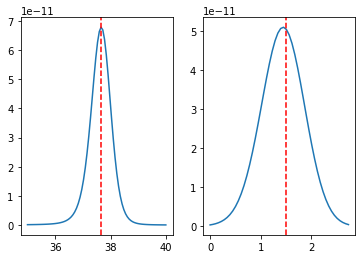

In [164]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.plot(nu0, p_nu0)
ax1.axvline(nu0r[i], color='r', linestyle='dashed')

ax2.plot(T0, p_T0)

ax2.axvline(T0r[i], color='r', linestyle='dashed')

In [203]:
levels = np.linspace(p_nu0.min(), p_nu0.max(), 10)

In [174]:
level = levels[0]

In [179]:
i = p_nu0 >= level

In [183]:
from scipy.interpolate import CubicSpline

In [186]:
f_nu0_interp = CubicSpline(nu0, p_nu0)

In [187]:
new_nu0 = np.linspace(nu0.min(), nu0.max(), 10000)
p_nu0_interp = f_nu0_interp(new_nu0)

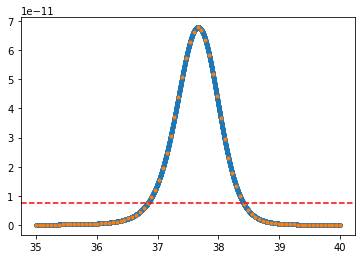

In [188]:
plt.plot(new_nu0, p_nu0_interp, '.')

plt.plot(nu0, p_nu0, '.')

plt.axhline(level, color='r', linestyle='dashed')

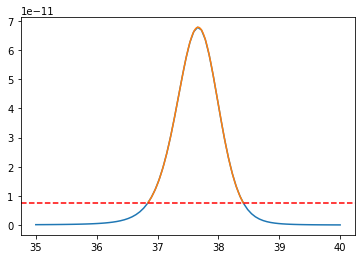

In [197]:
i = p_nu0_interp >= level


plt.plot(nu0, p_nu0)

plt.plot(new_nu0[i], p_nu0_interp[i])

plt.axhline(level, color='r', linestyle='dashed')

In [202]:
v0 = np.trapz(x=new_nu0, y=p_nu0_interp)

In [215]:
levels = np.linspace(p_nu0_interp.min(), p_nu0_interp.max(), 1000)

In [216]:
v = []

for level in levels:

    i = p_nu0_interp >= level

    v.append(np.trapz(x=new_nu0[i], y=p_nu0_interp[i])/v0)

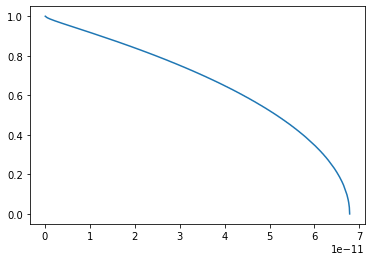

In [217]:
plt.plot(levels, v)

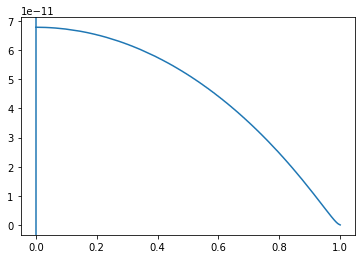

In [229]:
plt.plot(v, levels)

plt.axvline(level_1sigma)

In [258]:
levels_sigma = np.interp(x=[.683, .954, .997], xp=v[::-1], fp=levels[::-1])

levels_sigma

array([3.68321200e-11, 5.19547478e-12, 2.42122515e-13])

(0, 0.01)

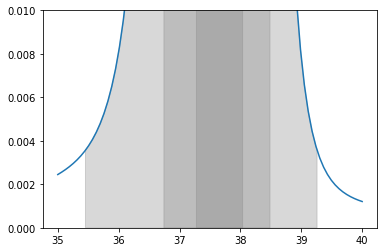

In [261]:
pmax = p_nu0.max()

plt.plot(nu0, p_nu0/pmax)

for level in levels_sigma:
    
    i = p_nu0_interp >= level

    plt.fill_between(new_nu0[i], p_nu0_interp[i]/pmax,
                     alpha=.3, color='gray')
    
plt.ylim(0, .01)

In [255]:
nu0c, nu0i, nu0f = nu0r[i_max], nu0r[i_max] - new_nu0[i].min(), new_nu0[i].max() - nu0r[i_max]

In [256]:
np.round([nu0c, nu0i, nu0f], 1)

array([37.7,  0.9,  0.8])

In [268]:
T0_grid.shape

(80, 50)

$$ 37.7_{-0.9}^{+0.8} $$

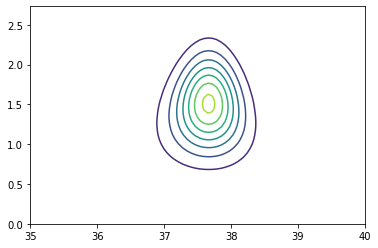

In [314]:
plt.contour(nu0_grid, T0_grid, L)

In [317]:
v0 = L.sum()

v0

9.816018357172371e-10

In [319]:
levels = np.linspace(L.min(), L.max(), 100)

In [322]:
v = np.array([L[L>level].sum() for level in levels])/v0

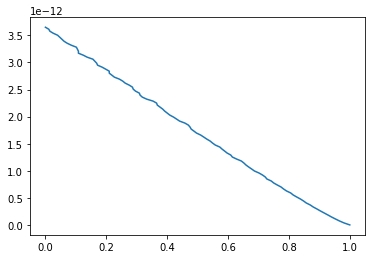

In [324]:
plt.plot(v, levels)

In [336]:
levels_sigma = np.interp(x=[.997, .954, .683], xp=v[::-1], fp=levels[::-1])

In [337]:
levels_sigma

array([5.81258122e-15, 1.06612590e-13, 1.01047571e-12])

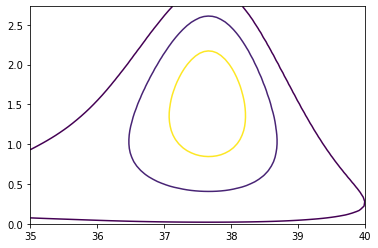

In [338]:
plt.contour(nu0_grid, T0_grid, L, levels=levels_sigma)